# **Projet de Série temporelles: Pollution à Tokyo**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
data = pd.read_csv('air_pollution.csv')
data.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


In [10]:
poll=data['pollution_today']

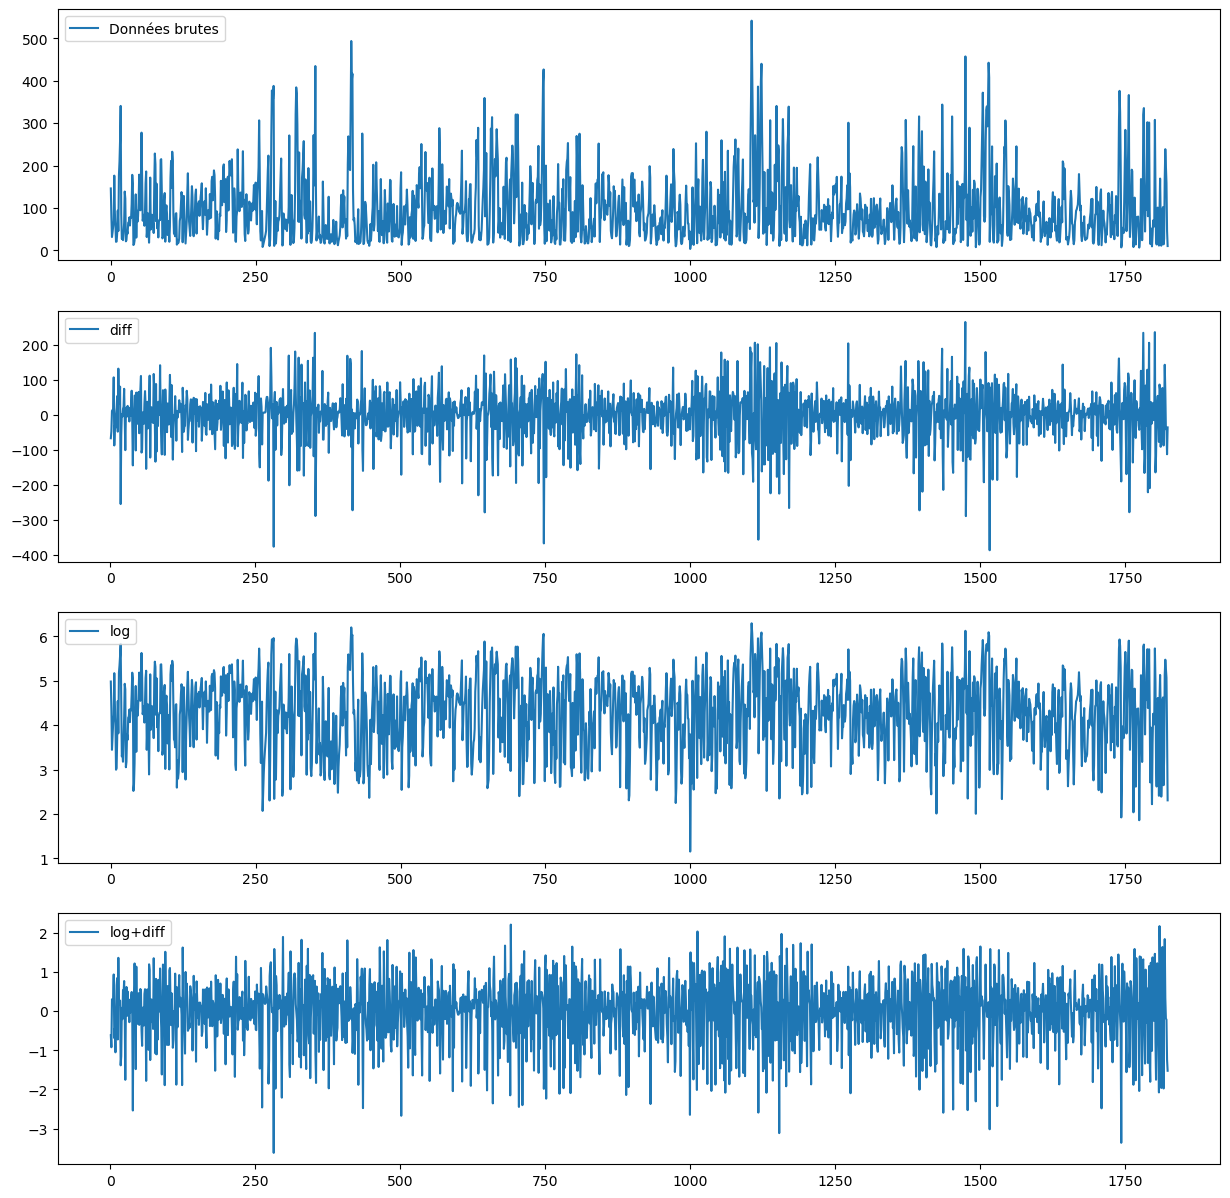

In [20]:
plt.figure(figsize=(15, 15))

plt.subplot(411)
plt.plot(poll, label='Données brutes')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(poll.diff().dropna(), label='diff')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(np.log(poll), label='log')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(np.log(poll).diff().dropna(), label='log+diff')
plt.legend(loc='upper left')
plt.show()

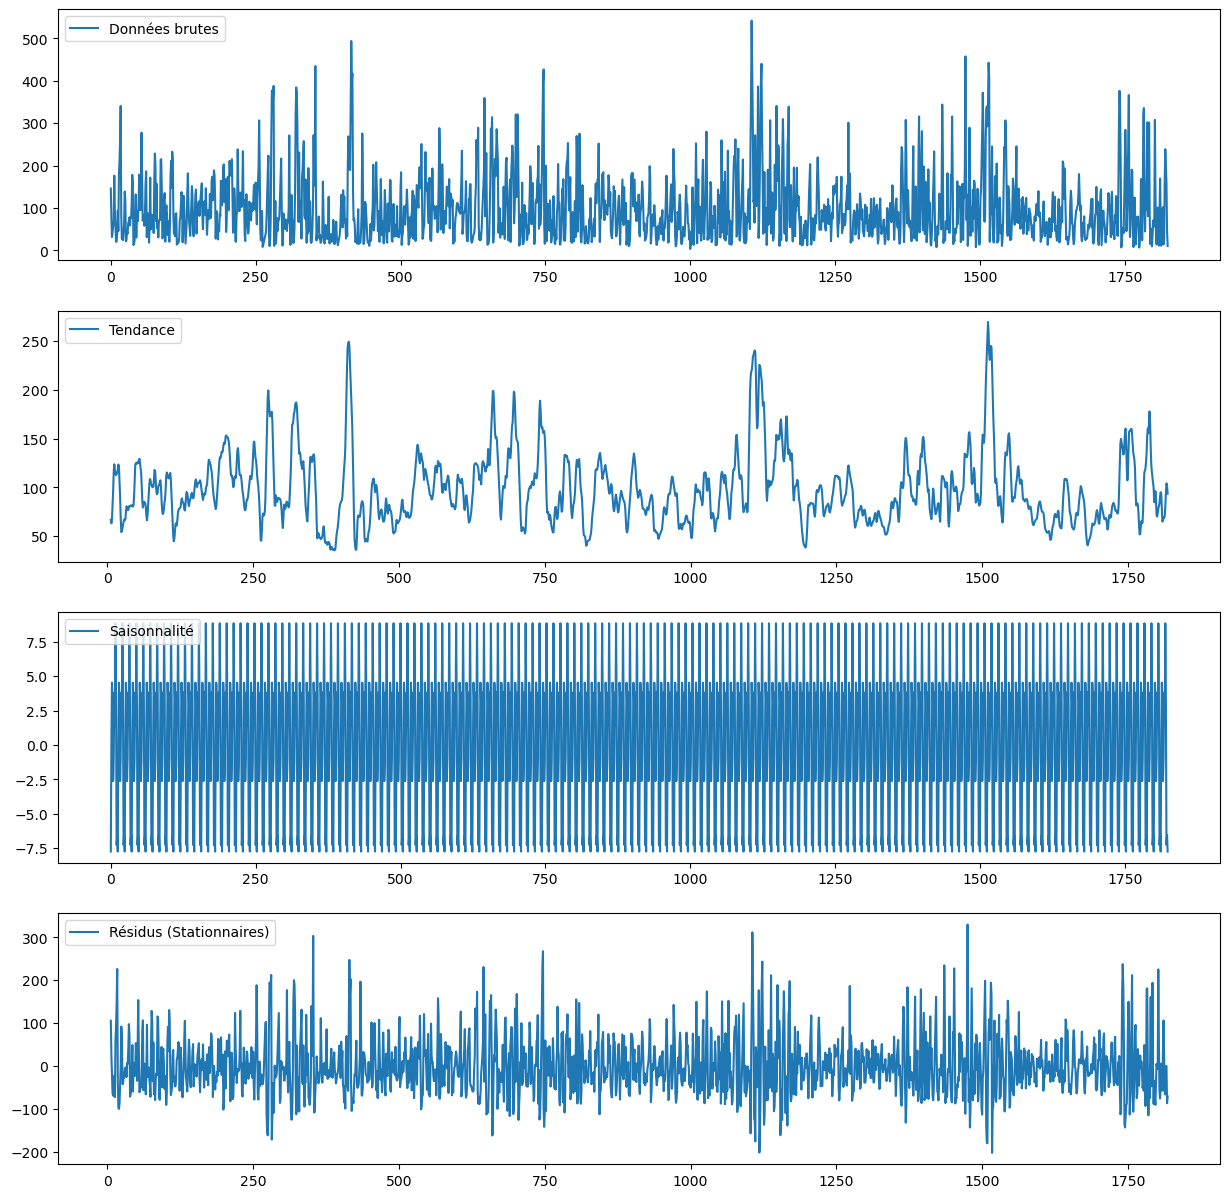

In [21]:
decompose_result = seasonal_decompose(poll, model='additive', period=12)
tendance = decompose_result.trend
saisonnalite = decompose_result.seasonal
residus = decompose_result.resid

plt.figure(figsize=(15, 15))
plt.subplot(411)
plt.plot(poll, label='Données brutes')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(tendance, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(saisonnalite, label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residus, label='Résidus (Stationnaires)')
plt.legend(loc='upper left')
plt.show()